<a href="https://colab.research.google.com/github/sarahasan17/New_trial/blob/main/poem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
import tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


**LOADING THE DATASET**

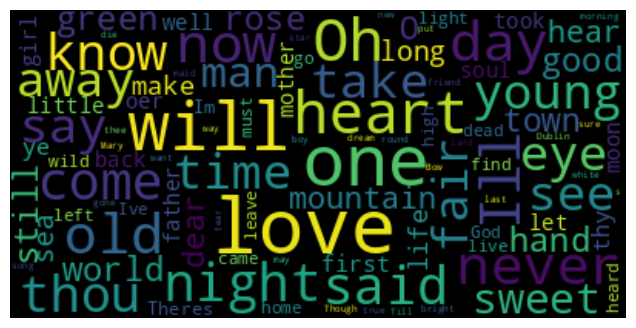

In [3]:
# Reading the text data file
data = open('poem.txt', encoding="utf8").read()

# EDA: Generating WordCloud to visualize
# the text
wordcloud = WordCloud(max_font_size=50,
					max_words=100,
					background_color="black").generate(data)

# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()


**CREATING THE CORPUS**

In [4]:
corpus = data.lower().split("\n")
print(corpus[:10])

['stay, i said', 'to the cut flowers.', 'they bowed', 'their heads lower.', 'stay, i said to the spider,', 'who fled.', 'stay, leaf.', 'it reddened,', 'embarrassed for me and itself.', 'stay, i said to my body.']


**Fitting the Tokenizer on the Corpus**

In [5]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)

print("Total Words:", total_words)

Total Words: 3807


In [ ]:
if corpus.lower() in

**Generating Embeddings/Vectorization**

In [6]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)
print(input_sequences)

[[   0    0    0 ...    0  266    3]
 [   0    0    0 ...  266    3   59]
 [   0    0    0 ...    0    4    1]
 ...
 [   0    0    0 ... 3807   15    4]
 [   0    0    0 ...   15    4  203]
 [   0    0    0 ...    4  203   85]]


**Building the Bi-directional LSTM Model**

In [7]:
 # Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100,
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           380800    
                                                                 
 bidirectional (Bidirection  (None, 15, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3807)              384507    
                                                                 
 dense_1 (Dense)             (None, 3808)              14500864  
                                                        

**MODEL TRAINING**

In [8]:
history = model.fit(predictors, label, epochs=150, batch_size=32, verbose=1)


Epoch 1/150
510/510 [==============================] - 31s 29ms/step - loss: 6.9490 - accuracy: 0.0617
Epoch 2/150
510/510 [==============================] - 7s 14ms/step - loss: 6.5304 - accuracy: 0.0635
Epoch 3/150
510/510 [==============================] - 6s 13ms/step - loss: 6.3454 - accuracy: 0.0650
Epoch 4/150
510/510 [==============================] - 7s 13ms/step - loss: 6.2134 - accuracy: 0.0723
Epoch 5/150
510/510 [==============================] - 6s 12ms/step - loss: 6.0975 - accuracy: 0.0808
Epoch 6/150
510/510 [==============================] - 7s 13ms/step - loss: 5.9828 - accuracy: 0.0880
Epoch 7/150
510/510 [==============================] - 6s 12ms/step - loss: 5.8735 - accuracy: 0.0951
Epoch 8/150
510/510 [==============================] - 7s 13ms/step - loss: 5.7678 - accuracy: 0.1000
Epoch 9/150
510/510 [==============================] - 6s 12ms/step - loss: 5.6645 - accuracy: 0.1066
Epoch 10/150
510/510 [==============================] - 6s 12ms/step - loss: 5.57

**GENERATING TEXT USING THE BUILT MODEL**

In [19]:
print('Enter the text to generate your poem:')
seed_text = input()
next_words = 50
ouptut_text = ""

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word
l=seed_text.split(' ')
n=len(l)
print()
for i in range(0,n-5,5):
  print(l[i+0]," ",l[i+1]," ",l[i+2]," ",l[i+3]," ",l[i+4])


Enter the text to generate your poem:
Life is
Life   is   a   precious   rare
jewel   mccree   two   presence   but
a   tiny   trace   erins   isle
are   erins   town   ever   saint
patrick   the   hickory   i   recognized
seen   the   bollin   sunbeam   night
the   englishmen   saw   that   down
as   i   mounted   the   platform
high   bright   tree   to   look
that   brave   far   from   your
